In [1]:
import pandas as pd

#### Load the example dataset

In [2]:
data_dir = "https://raw.githubusercontent.com/bd2kccd/py-causal/master/data/charity.txt"
df = pd.read_table(data_dir, sep="\t")

#### Start Java VM

In [3]:
from pycausal.pycausal import pycausal as pc
pc = pc()
pc.start_vm()

#### Create the Prior Knowledge Object

In [4]:
from pycausal import prior as p
forbid = [['TangibilityCondition','Impact']]
require =[['Sympathy','TangibilityCondition']]
tempForbid = p.ForbiddenWithin(['TangibilityCondition','Imaginability'])
temporal = [tempForbid,['Sympathy','AmountDonated'],['Impact']]
prior = p.knowledge(forbiddirect = forbid, requiredirect = require, addtemporal = temporal)
prior

Instance of edu.cmu.tetrad.data.Knowledge2: /knowledge
addtemporal

1*  Imaginability TangibilityCondition
2  AmountDonated Sympathy
3  Impact

forbiddirect
TangibilityCondition Impact

requiredirect
Sympathy TangibilityCondition

#### Load causal algorithms from the py-causal library and Run Bootstrapping FGES Mixed

In [5]:
from pycausal import search as s
tetrad = s.tetradrunner()
tetrad.getAlgorithmParameters(algoId = 'fges', scoreId = 'cond-gauss-bic')

structurePrior: Structure prior coefficient (min = 1.0) (java.lang.Double) [default:1.0]
discretize: Yes if continuous variables should be discretized when child is discrete (java.lang.Boolean) [default:true]
faithfulnessAssumed: Yes if (one edge) faithfulness should be assumed (java.lang.Boolean) [default:true]
symmetricFirstStep: Yes if the first step step for FGES should do scoring for both X->Y and Y->X (java.lang.Boolean) [default:false]
maxDegree: The maximum degree of the graph (min = -1) (java.lang.Integer) [default:4]
verbose: Yes if verbose output should be printed or logged (java.lang.Boolean) [default:true]
numberResampling: The number of bootstraps/resampling iterations (min = 0) (java.lang.Integer) [default:0]
percentResampleSize: The percentage of resample size (min = 0.1) (java.lang.Integer) [default:100]
resamplingWithReplacement: Yes, if sampling with replacement (bootstrapping) (java.lang.Boolean) [default:true]
resamplingEnsemble: Ensemble method: Preserved (0), Hig

In [6]:
tetrad.run(algoId = 'fges', dfs = df, scoreId = 'cond-gauss-bic', 
           priorKnowledge = prior, dataType = 'mixed', numCategoriesToDiscretize = 4,
           structurePrior = 1.0, maxDegree = 3, faithfulnessAssumed = True, verbose = True, 
           numberResampling = 5, resamplingEnsemble = 1, addOriginalDataset = True)

#### Bootstrapping FGES Mixed's Result's Nodes

In [7]:
tetrad.getNodes()

['AmountDonated',
 'Imaginability',
 'Impact',
 'Sympathy',
 'TangibilityCondition']

#### Bootstrapping FGES Mixed's Result's Edges

In [8]:
tetrad.getEdges()

['Sympathy --> Impact [Impact <-- Sympathy]:1.0000;',
 'Sympathy --> TangibilityCondition [Sympathy --> TangibilityCondition]:1.0000;',
 'AmountDonated --- Sympathy [AmountDonated --- Sympathy]:0.5000;[no edge]:0.5000;',
 'Imaginability --> Sympathy [Imaginability --> Sympathy]:0.5000;[no edge]:0.5000;',
 'Imaginability --> Impact [Imaginability --> Impact]:0.8333;[no edge]:0.1667;']

#### Plot The Result's Graph

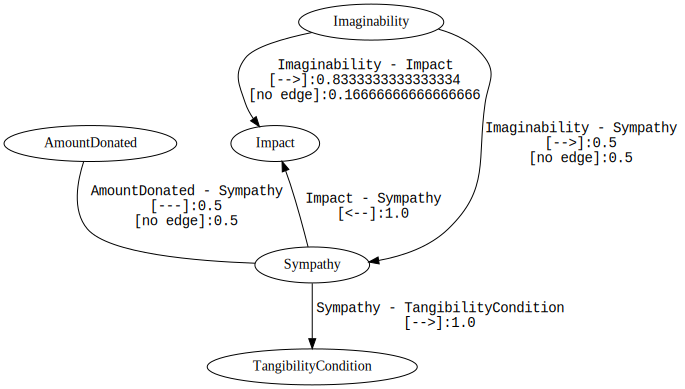

In [9]:
import pydot
from IPython.display import SVG
dot_str = pc.tetradGraphToDot(tetrad.getTetradGraph())
graphs = pydot.graph_from_dot_data(dot_str)
svg_str = graphs[0].create_svg()
SVG(svg_str)

#### Stop Java VM

In [10]:
pc.stop_vm()